In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

In [3]:
df.shape

(100000, 9)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
15667,Female,32.0,0,0,never,32.73,6.6,159,0
38032,Female,20.0,0,0,never,29.68,6.0,85,0
22962,Female,80.0,0,0,never,23.47,5.7,158,0
73857,Male,42.0,0,0,never,41.72,6.2,200,0
84043,Male,77.0,0,0,former,25.78,6.1,126,0
85663,Female,60.0,0,0,never,28.34,5.7,90,0
64424,Female,39.0,0,0,never,20.24,6.2,160,0
65407,Male,50.0,0,0,No Info,27.32,4.5,155,0
27093,Male,56.0,0,0,never,24.30,4.0,140,0
24811,Male,4.0,0,0,never,17.20,6.5,126,0


# **EDA (Exploratory data Analysis)**

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: >

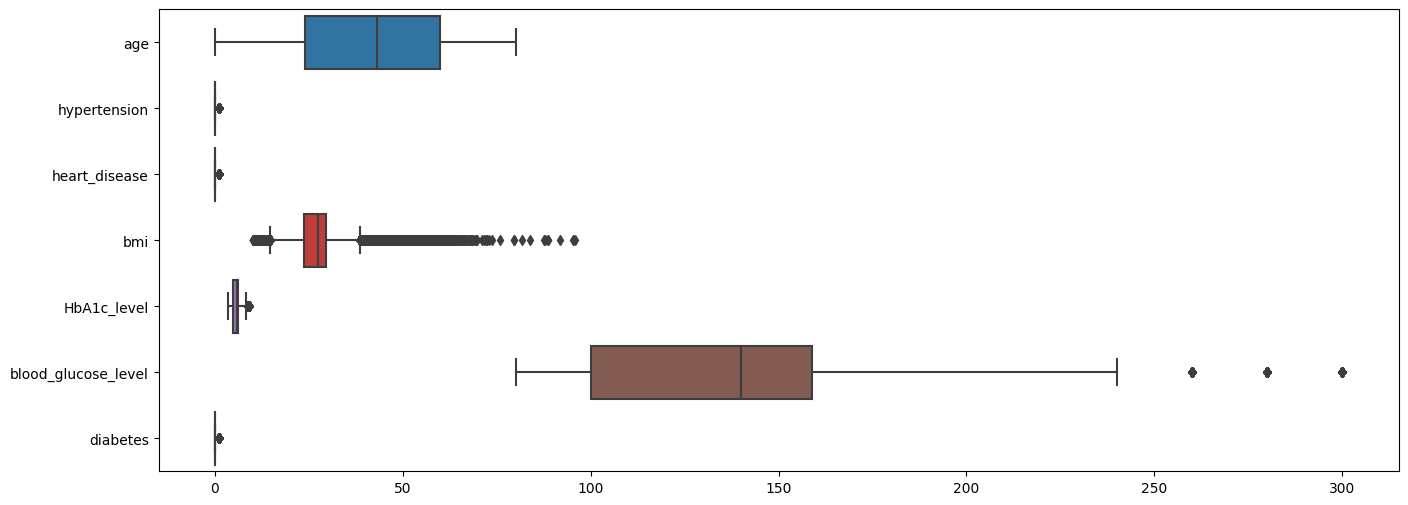

In [11]:
plt.figure(figsize=(16,6))
sns.boxplot(df,orient="h")

<AxesSubplot: xlabel='heart_disease', ylabel='diabetes'>

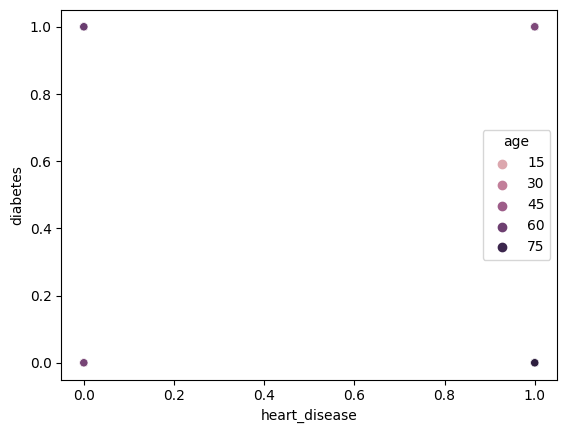

In [12]:
sns.scatterplot(x=df['heart_disease'],y=df['diabetes'],hue=df['age'])

<AxesSubplot: xlabel='blood_glucose_level', ylabel='Density'>

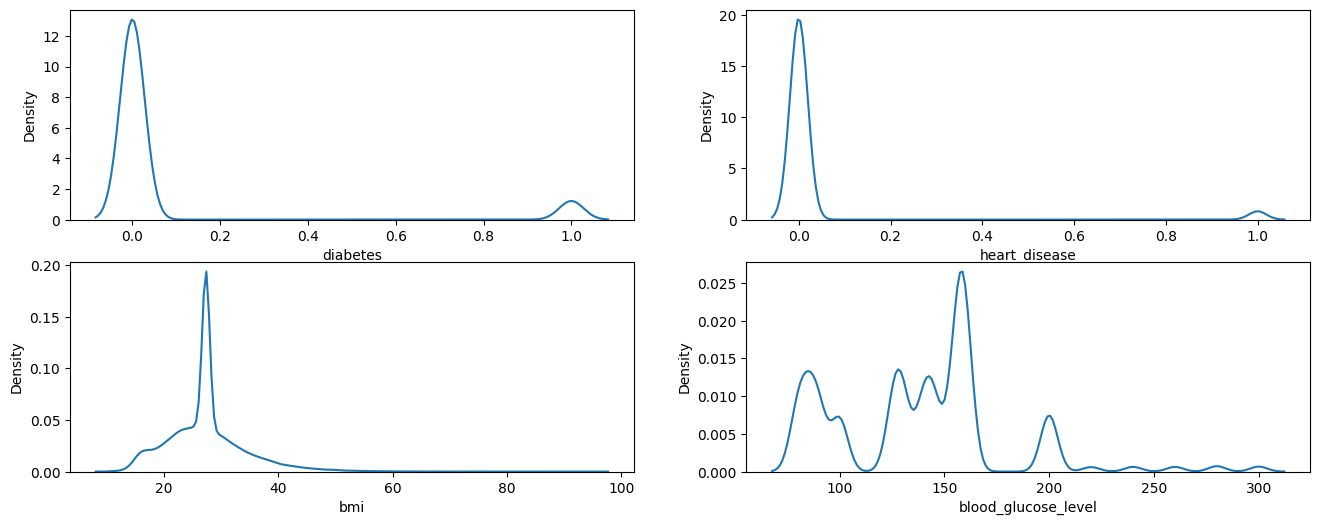

In [13]:
plt.figure(figsize=(16,6))
plt.subplot(2, 2, 1)
sns.kdeplot(df['diabetes'])
plt.subplot(2,2,2)
sns.kdeplot(df['heart_disease'])
plt.subplot(2,2,3)
sns.kdeplot(df['bmi'])
plt.subplot(2,2,4)
sns.kdeplot(df['blood_glucose_level'])

<AxesSubplot: xlabel='diabetes', ylabel='Count'>

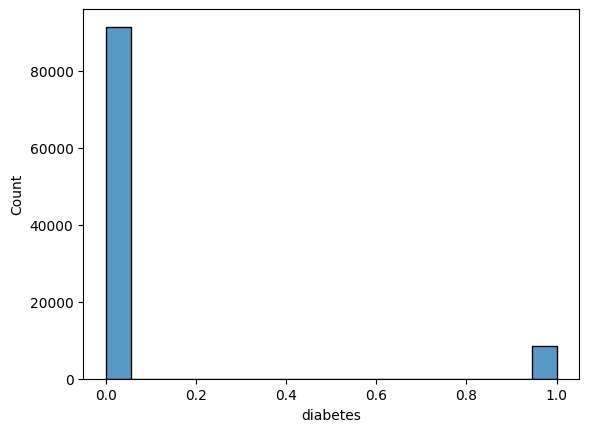

In [14]:
sns.histplot(df['diabetes'])

In [15]:
df['blood_glucose_level'].skew()

0.8216549517517585

In [16]:
df['bmi'].skew()

1.0438355183081105

# **Outliers Removing**

Actually outlier removing mmethod's two type
* Capping method (Ajust outlier with maximum and minimum values)
* Tramming method (Removing those row from datasets who's having outliers) 

In [17]:
##Tramming
upper_limit=df['blood_glucose_level'].mean() + 3*df['blood_glucose_level'].std()
lower_limit=df['blood_glucose_level'].mean() - 3*df['blood_glucose_level'].std()
upper_limit,lower_limit

(260.1824681461124, 15.93365185388761)

In [18]:
df.shape

(100000, 9)

In [19]:
new_df=df[(df['blood_glucose_level'] < upper_limit) & (df['blood_glucose_level'] > lower_limit)]

In [20]:
new_df.shape

(98597, 9)

In [21]:
new_df[(new_df['blood_glucose_level'] > upper_limit) | (new_df['blood_glucose_level'] < lower_limit)].shape

(0, 9)

<AxesSubplot: >

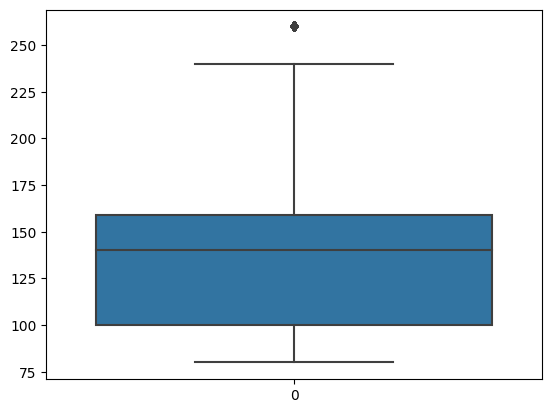

In [22]:
sns.boxplot(new_df['blood_glucose_level'])

In [23]:
##Tramming
upper_limit_bmi=df['bmi'].mean() + 3*df['bmi'].std()
lower_limit_bmi=df['bmi'].mean() - 3*df['bmi'].std()
upper_limit_bmi,lower_limit_bmi

(47.23111734994511, 7.410416850054897)

In [24]:
new_df[(new_df['bmi'] > upper_limit_bmi) | (new_df['bmi'] < lower_limit_bmi)].shape

(1231, 9)

In [25]:
##Capping with max and min value 
new_df['bmi']=np.where(
new_df['bmi']>upper_limit_bmi,
    upper_limit_bmi,np.where(
    new_df['bmi']<lower_limit_bmi,
        lower_limit_bmi,
        new_df['bmi']
    )
)

/tmp/ipykernel_20/326645041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bmi']=np.where(


<AxesSubplot: >

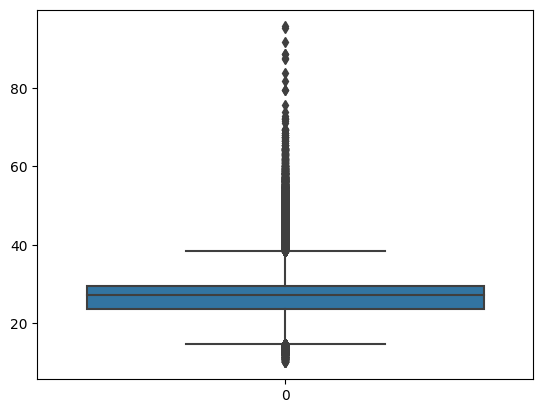

In [26]:
sns.boxplot(df['bmi'])

In [27]:
new_df[(new_df['bmi'] > upper_limit_bmi) | (new_df['bmi'] < lower_limit_bmi)].shape

(0, 9)

In [28]:
new_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,98597.000000,98597.000000,98597.000000,98597.000000,98597.000000,98597.000000,98597.000000
mean,41.619893,0.072497,0.037861,27.183006,5.507552,135.901559,0.071980
std,22.497724,0.259311,0.190861,6.321544,1.057208,36.712955,0.258456
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.570000,4.800000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.460000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,47.231117,9.000000,260.000000,1.000000


In [29]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Data Preprocess**

In [30]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [31]:
onh=OneHotEncoder()
stscaler=StandardScaler()

In [32]:
new_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [33]:
tf1=ColumnTransformer(transformers=[
    ('onh',onh,[0,4])
],remainder="passthrough")

In [34]:
tf2=ColumnTransformer(transformers=[
    ('stscaler',stscaler,slice(0,20))
],remainder="passthrough")

In [35]:
X=new_df.drop(columns="diabetes")
y=new_df['diabetes']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
lgr=LogisticRegression()

In [39]:
pipe_lgr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lgr',lgr),
])

In [40]:
pipe_lgr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stscaler', StandardScaler(),
                                                  slice(0, 20, None))])),
                ('lgr', LogisticRegression())])

In [41]:
y_pred_lgr=pipe_lgr.predict(X_test)

In [42]:
lgrs=accuracy_score(y_test,y_pred_lgr)

In [43]:
cm1=confusion_matrix(y_test,y_pred_lgr)

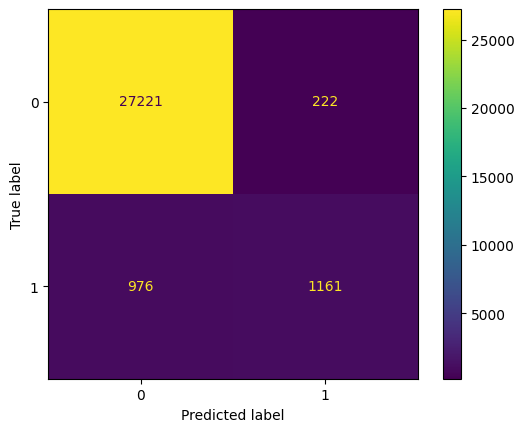

In [44]:
ConfusionMatrixDisplay(cm1).plot()

In [45]:
##Decision tree classifier
dtc=DecisionTreeClassifier()

In [46]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
#     ('tf2',tf2),
    ('dtc',dtc),
])

In [47]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('dtc', DecisionTreeClassifier())])

In [48]:
y_pred_dtc=pipe_dtc.predict(X_test)

In [49]:
dtcs=accuracy_score(y_test,y_pred_dtc)

In [50]:
cm2=confusion_matrix(y_test,y_pred_dtc)

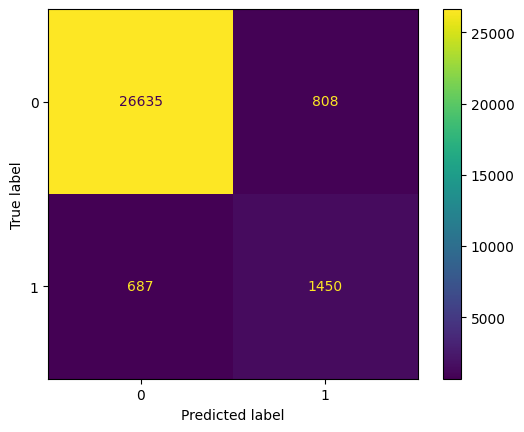

In [51]:
ConfusionMatrixDisplay(cm2).plot()

In [52]:
##random forest classifier
rfc=RandomForestClassifier()

In [53]:
pipe_rfc=Pipeline([
    ('tf1',tf1),
#     ('tf2',tf2),
    ('rfc',rfc),
])

In [54]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('rfc', RandomForestClassifier())])

In [55]:
y_pred_rfc=pipe_rfc.predict(X_test)

In [56]:
rfca=accuracy_score(y_test,y_pred_rfc)

In [57]:
cm3=confusion_matrix(y_test,y_pred_rfc)

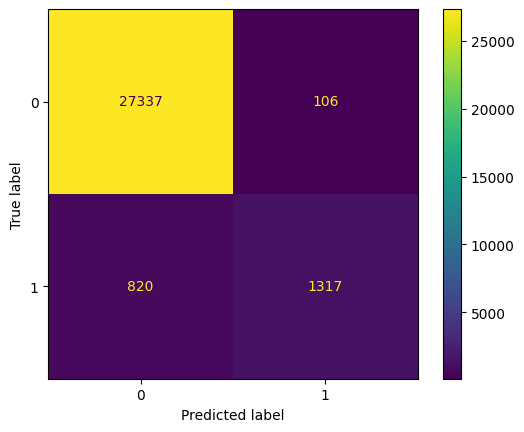

In [58]:
ConfusionMatrixDisplay(cm3).plot()

In [59]:
xgbc=XGBClassifier(learning_rate=0.10,n_estimators=120,booster="gbtree")

In [60]:
pipe_xgb=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgbx',xgbc),
])

In [61]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stscaler', StandardScaler(),
                                                  slice(0, 20, None))])),
                ('xgbx',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=120,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [62]:
y_pred_xgb=pipe_xgb.predict(X_test)

In [63]:
axgb=accuracy_score(y_test,y_pred_xgb)
axgb

0.9710615280594996

In [64]:
cm4=confusion_matrix(y_test,y_pred_xgb)

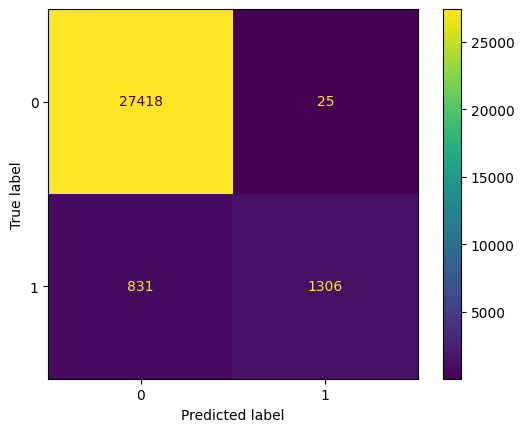

In [65]:
ConfusionMatrixDisplay(cm4).plot()

In [66]:
new_df.sample(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
90323,Male,8.0,0,0,No Info,15.01,6.2,145,0
61054,Female,25.0,0,0,ever,27.32,4.0,140,0
4602,Female,32.0,0,0,No Info,27.32,5.8,158,0
39124,Female,39.0,0,0,No Info,30.68,6.6,126,0


In [67]:
pipe_xgb.predict(pd.DataFrame([['Male',80.00,0,0,'never',25.45,5.8,145]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([0])

In [68]:
pipe_xgb.predict(pd.DataFrame([['Male',9.0,0,0,'No Info',22.88,6.6,200]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([0])

In [69]:
pipe_xgb.predict(pd.DataFrame([['Female',67.0,0,0,'never',47.231117,8.8,155]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([1])

In [70]:
pipe_xgb.predict(pd.DataFrame([['Male',63.0,1,0,'never',30.52,7.5,240]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([1])

In [71]:
gdrc=GradientBoostingClassifier(learning_rate=0.05)
adab=AdaBoostClassifier(learning_rate=0.2)

In [72]:
pipe_gdrc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gdrc',gdrc),
])

In [73]:
pipe_gdrc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stscaler', StandardScaler(),
                                                  slice(0, 20, None))])),
                ('gdrc', GradientBoostingClassifier(learning_rate=0.05))])

In [74]:
y_pred_gdrc=pipe_gdrc.predict(X_test)

In [75]:
gdrc_score=accuracy_score(y_test,y_pred_gdrc)

In [76]:
cm=confusion_matrix(y_test,y_pred_gdrc)

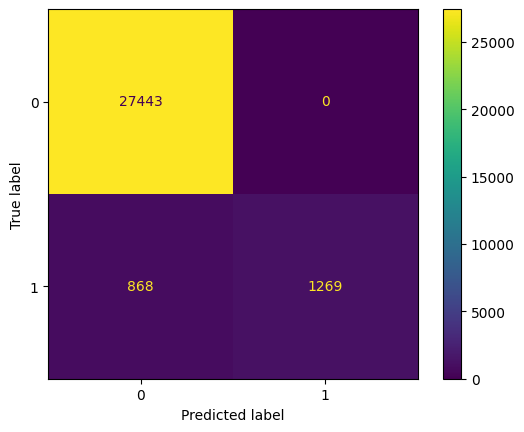

In [77]:
ConfusionMatrixDisplay(cm).plot()

In [78]:
pipe_ada=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('adagc',adab),
])

In [79]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stscaler', StandardScaler(),
                                                  slice(0, 20, None))])),
                ('adagc', AdaBoostClassifier(learning_rate=0.2))])

In [80]:
y_pred_ada=pipe_ada.predict(X_test)

In [81]:
ada_score=accuracy_score(y_test,y_pred_ada)

In [82]:
cm=confusion_matrix(y_test,y_pred_ada)

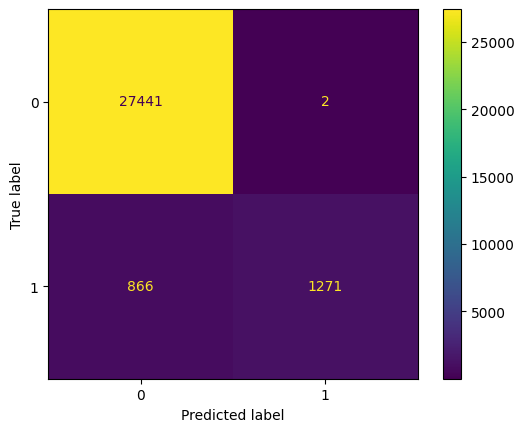

In [83]:
ConfusionMatrixDisplay(cm).plot()

In [84]:
pipe_ada.predict(pd.DataFrame([['Male',80.00,0,0,'never',25.45,5.8,145]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([0])

In [85]:
d={
    'Model Name':['Logistic Regression','Decision tree classifier','Randforest Classfier','XGBooting Classifier','AdaBoosting Classifier','Gradient Descent classifier'],
    'Accuracy':[lgrs,dtcs,rfca,axgb,ada_score,gdrc_score]
}

In [86]:
pd.DataFrame(d)

,Model Name,Accuracy
0,Logistic Regression,0.959500
1,Decision tree classifier,0.949459
2,Randforest Classfier,0.968695
3,XGBooting Classifier,0.971062
4,AdaBoosting Classifier,0.970656
5,Gradient Descent classifier,0.970656


### **From these all model our ideal model is XGBooting classifier**

In [87]:
pipe_xgb.predict(pd.DataFrame([['Female',59.0,1,0,'No Info',33.89,6.6,260]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([1])

***So , we can dump this model for develop in application***

In [88]:
import pickle as pkl

In [89]:
pkl.dump(pipe_xgb,open("XGB_model.pkl","wb"))

In [90]:
model=pkl.load(open("XGB_model.pkl","rb"))

In [91]:
model.predict(pd.DataFrame([['Male',80.00,0,0,'never',25.45,5.8,145]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([0])